대표적인 요약 통계량
- 평균값(이상치에 민감함)
- 중앙값(백분위 수의 50번째 값)
- percentile(백분위 수) -> boxplot
- Variance : 관측치에서 평균과의 거리의 제곱의 평균 (데이터의 퍼져있는 정도), 단위가 달라짐 
- Standard deviation : 분산의 제곱근하여 단위가 같아짐.
- Covariance (공분산) : x, y 두 변수의 각각의 관측치에서 각각의 평균을 빼고 곱한 값의 평균.  (단위가 살아있음)
- pearson correlation coefficient : 공분산에서 x, y의 표준편차로 나눠주어 일반화시킨 것. -1에서 1범위의 값으로 나옴.


실습을 위한 데이터 로드

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
x = pd.DataFrame(iris.data,columns= iris.feature_names)
y = pd.DataFrame(iris.target, columns = ['species'] )
df = pd.concat([x,y], axis = 1)
df.loc[df.species == 0, 'species'] = 'setosa'
df.loc[df.species == 1, 'species'] = 'versicolor'
df.loc[df.species == 2, 'species'] = 'virginica'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
setosa_petal_length = df[df.species == 'setosa']['petal length (cm)']
versicolor_petal_length = df[df.species == 'versicolor']['petal length (cm)']
virginica_petal_length = df[df.species == 'virginica']['petal length (cm)']


- mean

In [4]:
# Compute the mean: mean_length_vers
import numpy as np

mean_length_vers= np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


- percentile

In [5]:
# Specify array of percentiles: percentiles
import numpy as np

percentiles = np.array([2.5,25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles )


# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

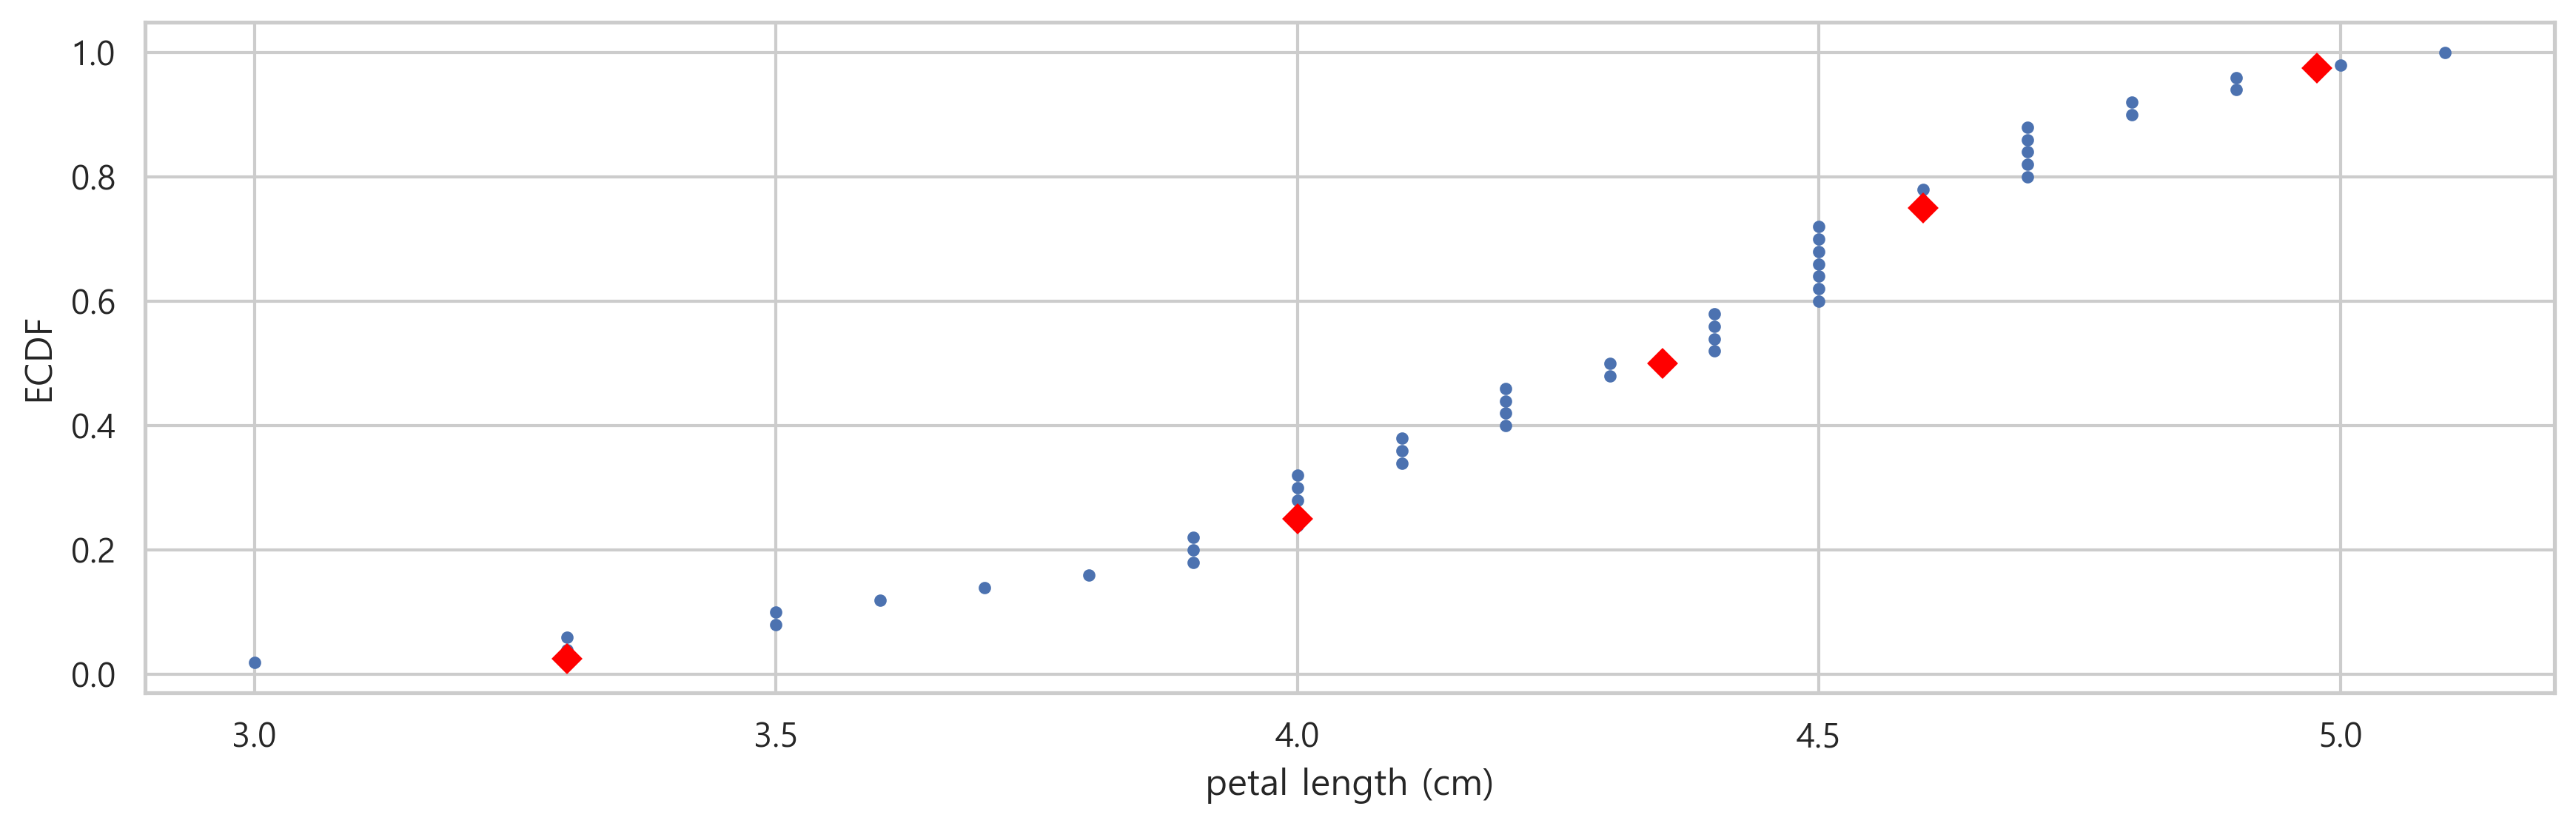

In [15]:
# Plot the ECDF

x_vers, y_vers = ecdf(versicolor_petal_length)

_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


- box plot

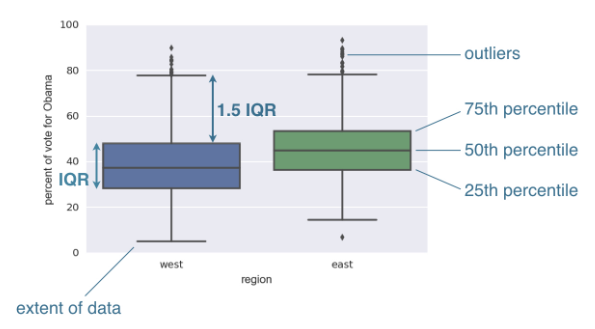

In [5]:
from IPython.display import Image
Image("image/boxplot.png") 

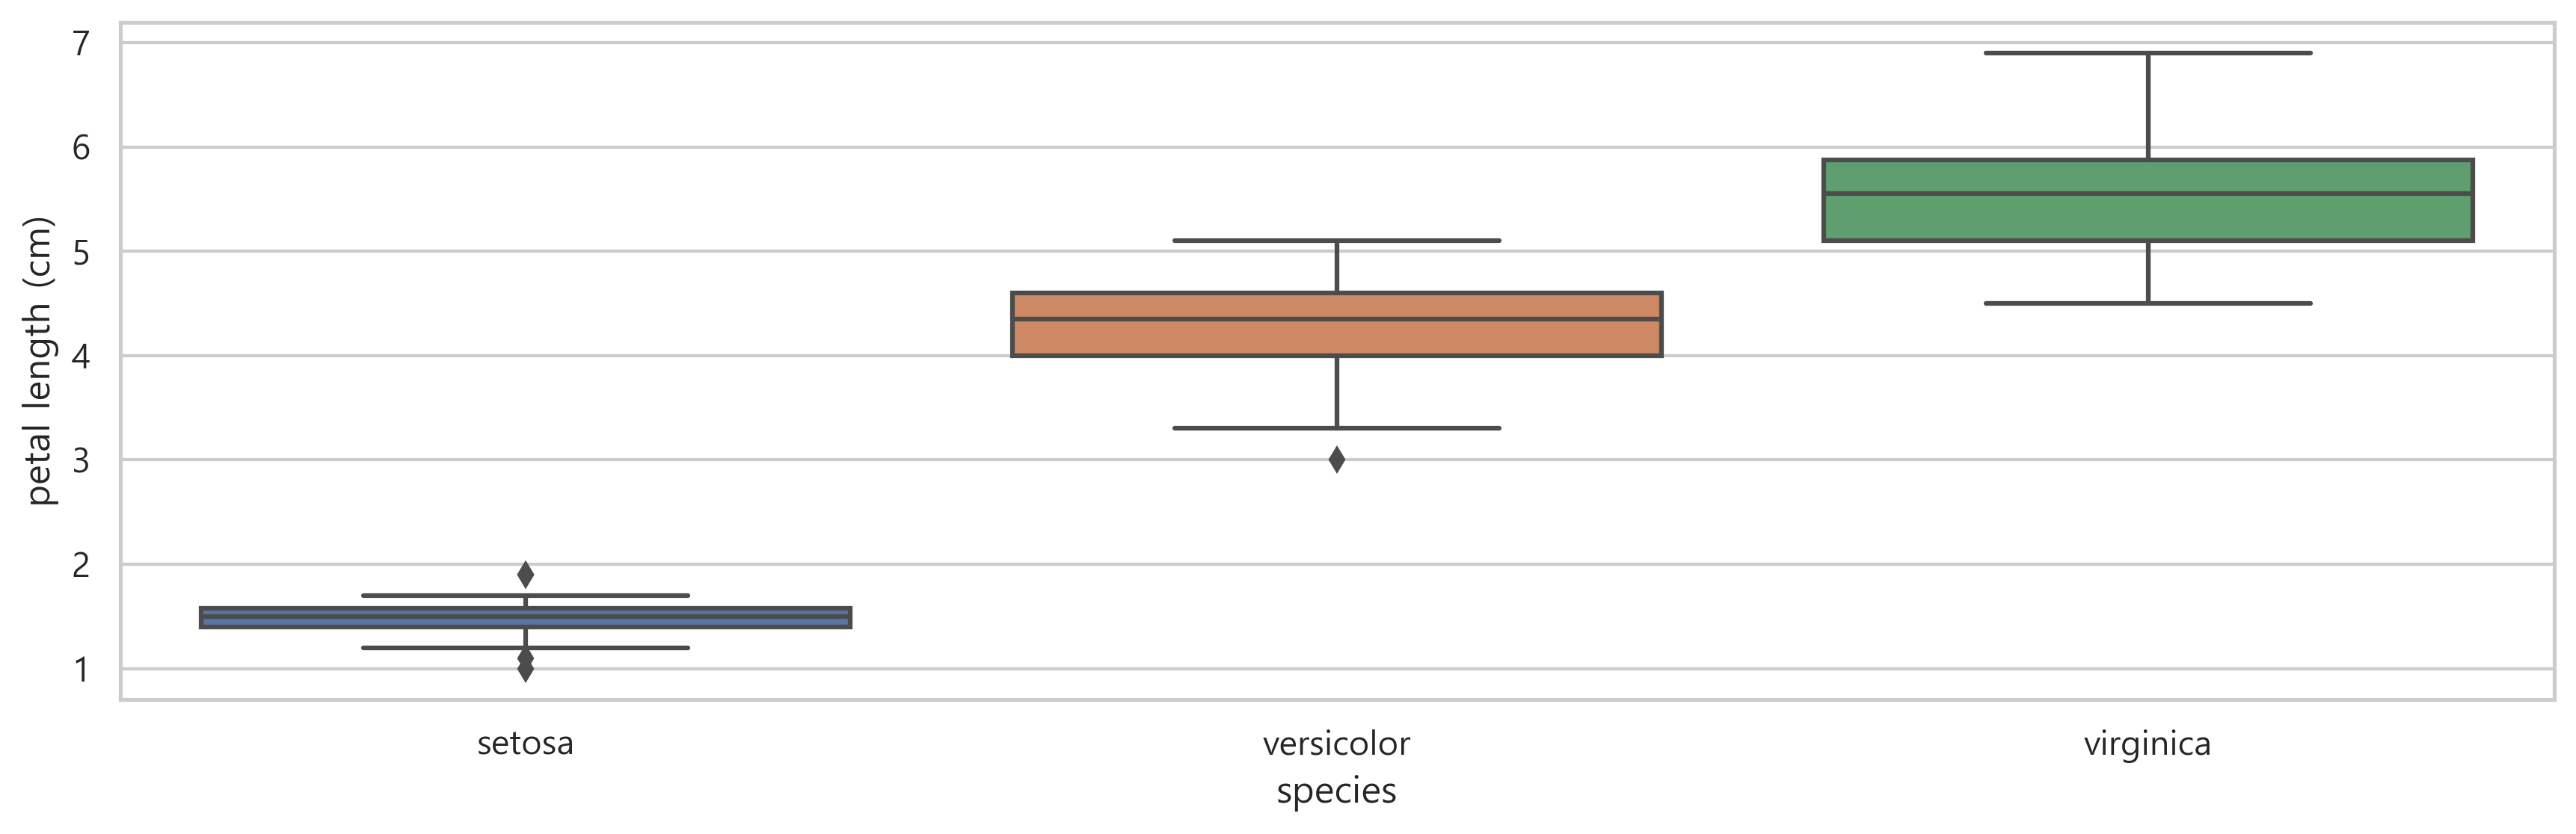

In [16]:
# Create box plot with Seaborn's default settings
df.head()
_ = sns.boxplot(x='species', y ='petal length (cm)', data = df)
# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


- Variance 

In [18]:
np.var(setosa_petal_length)

0.02955600000000001

- Standard deviation

In [19]:
np.std(setosa_petal_length)

0.17191858538273286

- Covariance

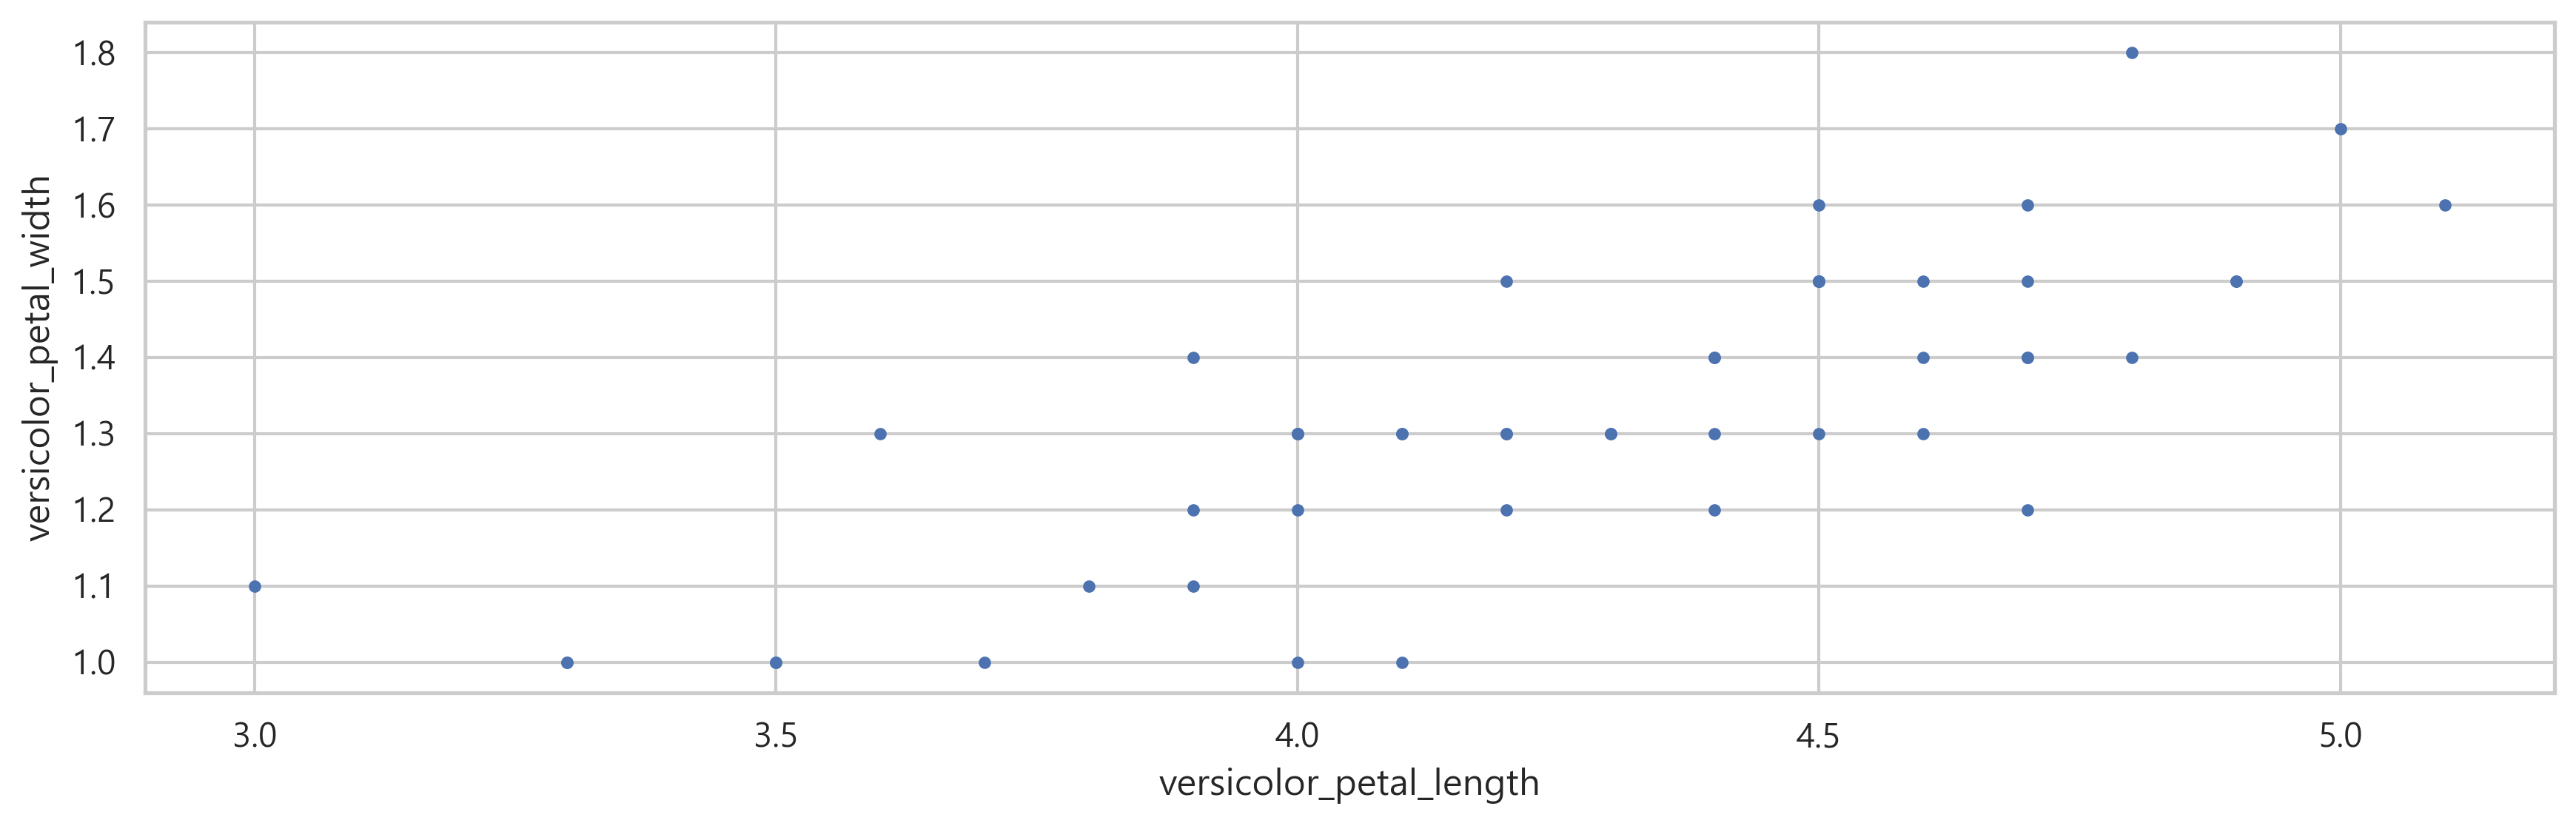

In [21]:
versicolor_petal_width = df[df.species == 'versicolor']['petal width (cm)']

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

In [25]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)
print('')
# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]

0.07310204081632653


- pearson correlation coefficient

In [26]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)


0.7866680885228169
